In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#import the census csv
census_pd = pd.read_csv("sub-est2016_6.csv", encoding='ISO-8859-1')
census_pd

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,40,6,0,0,0,0,0,A,California,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
1,162,6,0,296,0,0,0,A,Adelanto city,California,31765,31760,31672,31895,31145,31287,32626,33077,33391
2,162,6,0,394,0,0,0,A,Agoura Hills city,California,20330,20330,20337,20494,20576,20633,20700,20795,20745
3,162,6,0,562,0,0,0,A,Alameda city,California,73812,73812,73964,74730,75716,76556,77562,78363,78906
4,162,6,0,674,0,0,0,A,Albany city,California,18539,18543,18575,18763,19008,19236,19477,19669,19688
5,162,6,0,884,0,0,0,A,Alhambra city,California,83089,83096,83168,83685,84265,84521,85003,85058,85474
6,162,6,0,947,0,0,0,A,Aliso Viejo city,California,47823,48052,48200,48913,49518,50036,50043,49985,51424
7,162,6,0,1444,0,0,0,A,Alturas city,California,2827,2827,2831,2765,2708,2634,2615,2585,2537
8,162,6,0,1514,0,0,0,A,Amador City city,California,185,185,185,185,184,183,185,189,191
9,162,6,0,1640,0,0,0,A,American Canyon city,California,19454,19542,19626,19859,20057,20299,20389,20466,20452


In [3]:
#rename the column Name to City
census_pd1 = census_pd.rename(columns={"NAME":"City"})
census_pd1.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,City,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,40,6,0,0,0,0,0,A,California,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
1,162,6,0,296,0,0,0,A,Adelanto city,California,31765,31760,31672,31895,31145,31287,32626,33077,33391
2,162,6,0,394,0,0,0,A,Agoura Hills city,California,20330,20330,20337,20494,20576,20633,20700,20795,20745
3,162,6,0,562,0,0,0,A,Alameda city,California,73812,73812,73964,74730,75716,76556,77562,78363,78906
4,162,6,0,674,0,0,0,A,Albany city,California,18539,18543,18575,18763,19008,19236,19477,19669,19688


In [4]:
#filter out the required columns
other_df = census_pd1.iloc[:, 8:]
other_df.head()

,City,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,California,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017
1,Adelanto city,California,31765,31760,31672,31895,31145,31287,32626,33077,33391
2,Agoura Hills city,California,20330,20330,20337,20494,20576,20633,20700,20795,20745
3,Alameda city,California,73812,73812,73964,74730,75716,76556,77562,78363,78906
4,Albany city,California,18539,18543,18575,18763,19008,19236,19477,19669,19688


In [5]:
#dropping unneccassary columns
other_df1 = other_df.drop(['STNAME','CENSUS2010POP','ESTIMATESBASE2010'], axis=1)
other_df1.head()

,City,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,California,37332685,37676861,38011074,38335203,38680810,38993940,39250017
1,Adelanto city,31672,31895,31145,31287,32626,33077,33391
2,Agoura Hills city,20337,20494,20576,20633,20700,20795,20745
3,Alameda city,73964,74730,75716,76556,77562,78363,78906
4,Albany city,18575,18763,19008,19236,19477,19669,19688


In [6]:
#filtering San Jose city
census_pd2 = other_df1.loc[other_df["City"] == "San Jose city"]
census_pd2 = census_pd2.transpose()
census_pd2

,378,971
City,San Jose city,San Jose city
POPESTIMATE2010,955290,955290
POPESTIMATE2011,970823,970823
POPESTIMATE2012,984151,984151
POPESTIMATE2013,1001580,1001580
POPESTIMATE2014,1013237,1013237
POPESTIMATE2015,1022627,1022627
POPESTIMATE2016,1025350,1025350


In [7]:
census_pd3 = census_pd2.rename(columns={970: "Population"})
census_pd3

,378,971
City,San Jose city,San Jose city
POPESTIMATE2010,955290,955290
POPESTIMATE2011,970823,970823
POPESTIMATE2012,984151,984151
POPESTIMATE2013,1001580,1001580
POPESTIMATE2014,1013237,1013237
POPESTIMATE2015,1022627,1022627
POPESTIMATE2016,1025350,1025350


In [8]:
census_pd3 = census_pd3.drop(census_pd3.index[0])
census_pd3

,378,971
POPESTIMATE2010,955290,955290
POPESTIMATE2011,970823,970823
POPESTIMATE2012,984151,984151
POPESTIMATE2013,1001580,1001580
POPESTIMATE2014,1013237,1013237
POPESTIMATE2015,1022627,1022627
POPESTIMATE2016,1025350,1025350


In [9]:
census_pd3.reset_index(inplace=True)
census_pd3

,index,378,971
0,POPESTIMATE2010,955290,955290
1,POPESTIMATE2011,970823,970823
2,POPESTIMATE2012,984151,984151
3,POPESTIMATE2013,1001580,1001580
4,POPESTIMATE2014,1013237,1013237
5,POPESTIMATE2015,1022627,1022627
6,POPESTIMATE2016,1025350,1025350


In [10]:
census_pd4 = census_pd3.rename(columns={"index":"Year"})
census_pd4

,Year,378,971
0,POPESTIMATE2010,955290,955290
1,POPESTIMATE2011,970823,970823
2,POPESTIMATE2012,984151,984151
3,POPESTIMATE2013,1001580,1001580
4,POPESTIMATE2014,1013237,1013237
5,POPESTIMATE2015,1022627,1022627
6,POPESTIMATE2016,1025350,1025350


In [11]:
#Getting income data for San Jose
income_pd = pd.read_csv("Affordability_Income_sanjose.csv", encoding='ISO-8859-1')
income_pd1 = income_pd.transpose()
income_pd1

FileNotFoundError: File b'Affordability_Income_sanjose.csv' does not exist

In [12]:
income_pd2 = income_pd1.drop(income_pd1.index[0])
income_pd2

,0
2010,84557.1
2011,86500.8
2012,91530.9
2013,93623.8
2014,98761.7
2015,103444
2016,106676


In [13]:
income_pd2.reset_index(inplace=True)
income_pd2

,index,0
0,2010,84557.1
1,2011,86500.8
2,2012,91530.9
3,2013,93623.8
4,2014,98761.7
5,2015,103444
6,2016,106676


In [14]:
income_pd3 =income_pd2.rename(columns={"index":"Year", 0: "Median Income"})
income_pd3

,Year,Median Income
0,2010,84557.1
1,2011,86500.8
2,2012,91530.9
3,2013,93623.8
4,2014,98761.7
5,2015,103444
6,2016,106676


In [15]:
population_income = pd.merge(census_pd4, income_pd3, on="Year")
population_income

,Year,Population,Median Income
0,2010,955290,84557.1
1,2011,970823,86500.8
2,2012,984151,91530.9
3,2013,1001580,93623.8
4,2014,1013237,98761.7
5,2015,1022627,103444
6,2016,1025350,106676


In [120]:
# population = []

# for pop in population_income['Population']:
#     population.append(pop)
    
# print(population)
# population = population_income['Population']
pop = population_income['Population'].values
inc = population_income['Median Income'].values


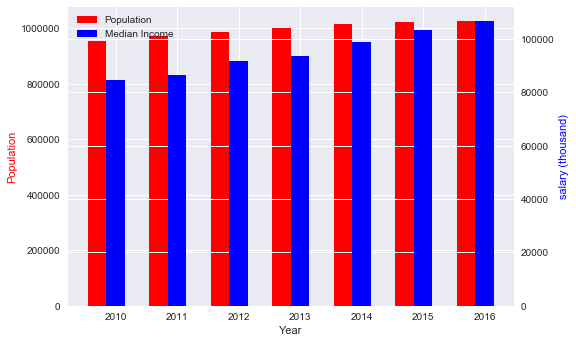

In [176]:
x_values = np.arange(len(population_income['Year']))
w=0.3

ax1 = plt.subplot(111)
ax1.set_xticklabels(['0','2010','2011','2012','2013','2014','2015','2016'])
l1 = ax1.bar(x_values-w, pop, width=w, color ='r')
ax1.set_xlabel('Year')
# ax1.set_xticklabels('2010','2011','2012','2013','2014','2015','2016')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Population', color='r')
# ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2 = ax2.bar(x_values, inc, width=w, color ='b')
ax2.set_ylabel('salary (thousand)', color='b')




# ax.autoscale(tight=False)

# plt.xticks(population_income['Year'], population_income['Median Income'])
# plt.xlim(2009,2017)
# plt.ylim(80000,120000)
plt.legend([l1,l2],['Population','Median Income'])
plt.savefig('San Jose city.png')
plt.show()